<a href="https://colab.research.google.com/github/esther-chung/econ2005/blob/master/%EC%BD%94%EB%A1%9C%EB%82%98_%EC%B9%B4%EB%93%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **카드데이터**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
import math
from datetime import date, timedelta

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
card = pd.read_csv('/content/drive/Shared drives/경제정보분석/KT_data_20200717/card_20200717.csv')

In [ ]:
card.head()

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
0,20200104,1174066000,성내3동,7041,약국,463,5843230
1,20200104,1174066000,성내3동,7022,치과의원,33,7835550
2,20200104,1174066000,성내3동,7021,한의원,53,4589800
3,20200104,1174066000,성내3동,7020,의원,339,9267240
4,20200104,1174066000,성내3동,6110,자동차정비,19,4441000


## **여행 관련 카테고리 (국내, 국외 포함)**

In [ ]:
rentcar = card[card.mrhst_induty_cl_nm == '렌 트 카']
dutyfree = card[card.mrhst_induty_cl_nm == '면 세 점']
airline = card[card.mrhst_induty_cl_nm == '항 공 사']
ferry = card[card.mrhst_induty_cl_nm == '여 객 선']
bus = card[card.mrhst_induty_cl_nm == '고속 버스']
tour = card[card.mrhst_induty_cl_nm == '관광여행']

In [ ]:
card.mrhst_induty_cl_nm.unique()

array(['약국', '치과의원', '한의원', '의원', '자동차정비', '기타 교육', '보습학원', '일반 서적', '정장',
       '슈퍼 마켓', '편 의 점', '기타레져업', '노래방', '당구장', '헬스 크럽', '스포츠레져용품',
       '기계 공구', '기타건축자재', '기타음료식품', '농축수산품', '정 육 점', '제과점', '스넥', '주점',
       '서양음식', '중국음식', '일식회집', '일반한식', '화 장 품', '미 용 원', '주 차 장', '화   원',
       '비 영 리', '레져업소(회원제형태)', '예체능학원', '문구용 품', '사진관', '단란주점', '악세 사리',
       '기타숙박업', '세탁소', '유흥주점', '안경', '유아원', '기타잡화', '인터넷종합Mall', '대형할인점',
       '애완 동물', '학원(회원제형태)', '사무서비스', '독서실', '외국어학원', '피부미용실',
       '자사카드발행백화점', '영화관', '신   발', '내의판매점', '칵테일바', '기타대인서비스', '동물병원',
       '사무통신기기수리', '기타사무용품', '통신 기기', '출판인쇄물', '가전 제품', '기타유통업',
       '농축수산가공품', '종합용역', '병원', '기타가구', '자동차부품', '주 유 소', '안마/스포츠마사지',
       '스크린골프', '의료 용품', '조세서비스(특약)', '조세서비스', '기타서적문구', '인터넷Mall',
       '인터넷P/G', '기타전문점', '기타회원제형태업소4', '가정용품수리', '법률회계서비스(법인)', '소프트웨어',
       '부동산중개/임대', '화물 운송', '혼례서비스', '기타건강식', '주류판매점', '위탁급식업', '사우나',
       '미용 재료', '컴퓨터학원', '기타의류', '상품권', '골프연습장', '골프 용품', '관광여행', '유류 판매',
   

In [ ]:
tour

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt
1146,20200104,1168064000,역삼1동,1110,관광여행,64,14476000
2020,20200104,1165052000,서초2동,1110,관광여행,17,9581645
8398,20200104,1114055000,명동,1110,관광여행,620,353362379
8684,20200104,1111061500,종로1.2.3.4가동,1110,관광여행,349,455883605
8762,20200104,1111053000,사직동,1110,관광여행,13,18934475
...,...,...,...,...,...,...,...
3705350,20200614,1168064000,역삼1동,1110,관광여행,4,120000
3708061,20200614,1114055000,명동,1110,관광여행,44,2707000
3710111,20200614,1168053100,논현2동,1110,관광여행,2,100000
3712046,20200614,1162066500,서림동,1110,관광여행,3,2881500


In [ ]:
import re
from datetime import datetime, timedelta
tour.index = np.arange(0,len(tour))
tour_date_set = []
for date in list(tour.receipt_dttm) :
    date = str(date)
    tour_date_set.append(datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

tour['date_set'] = tour_date_set
tour

,receipt_dttm,adstrd_code,adstrd_nm,mrhst_induty_cl_code,mrhst_induty_cl_nm,selng_cascnt,salamt,date_set
0,20200104,1168064000,역삼1동,1110,관광여행,64,14476000,2020-01-04
1,20200104,1165052000,서초2동,1110,관광여행,17,9581645,2020-01-04
2,20200104,1114055000,명동,1110,관광여행,620,353362379,2020-01-04
3,20200104,1111061500,종로1.2.3.4가동,1110,관광여행,349,455883605,2020-01-04
4,20200104,1111053000,사직동,1110,관광여행,13,18934475,2020-01-04
...,...,...,...,...,...,...,...,...
3975,20200614,1168064000,역삼1동,1110,관광여행,4,120000,2020-06-14
3976,20200614,1114055000,명동,1110,관광여행,44,2707000,2020-06-14
3977,20200614,1168053100,논현2동,1110,관광여행,2,100000,2020-06-14
3978,20200614,1162066500,서림동,1110,관광여행,3,2881500,2020-06-14


In [ ]:

tour["month"] = tour['date_set'].map(lambda x: x.month)

In [ ]:
tour_monthly = tour.groupby(['month'])
for group in tour_monthly:
    print(group)

(1,      receipt_dttm  adstrd_code    adstrd_nm  ...     salamt   date_set  month
0        20200104   1168064000         역삼1동  ...   14476000 2020-01-04      1
1        20200104   1165052000         서초2동  ...    9581645 2020-01-04      1
2        20200104   1114055000           명동  ...  353362379 2020-01-04      1
3        20200104   1111061500  종로1.2.3.4가동  ...  455883605 2020-01-04      1
4        20200104   1111053000          사직동  ...   18934475 2020-01-04      1
..            ...          ...          ...  ...        ...        ...    ...
446      20200131   1162064500          서원동  ...     225000 2020-01-31      1
447      20200131   1168061000         대치2동  ...    3000000 2020-01-31      1
448      20200131   1168054500         압구정동  ...    3439400 2020-01-31      1
449      20200131   1111053000          사직동  ...   17986220 2020-01-31      1
450      20200131   1114052000          소공동  ...     677000 2020-01-31      1

[451 rows x 9 columns])
(2,       receipt_dttm  adstrd_code

In [ ]:
#plt.plot(np.arange(1,7), tour_amount)

In [ ]:
tour_sum = tour.groupby(tour.month).sum()

In [ ]:
tour_sum

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt
month,,,,,
1,9110256124,514817527300,500610,18659,14515564097
2,15533966906,880011659600,853590,8262,3077039119
3,16988465625,962346474000,933510,8421,730158781
4,14928107170,844627680400,820290,5728,1451840918
5,16342218001,925557838000,897990,6378,1605042749
6,7494425320,424281459300,411810,3476,656722616


In [ ]:
#6월의 경우, 데이터가 14일까지 존재하므로 임의로 30/14배를 곱한 값을 부여함
rate = (float(30)/14)
tour_sum['salamt'][6] *= rate

In [ ]:
tour_sum

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt
month,,,,,
1,9110256124,514817527300,500610,18659,14515564097
2,15533966906,880011659600,853590,8262,3077039119
3,16988465625,962346474000,933510,8421,730158781
4,14928107170,844627680400,820290,5728,1451840918
5,16342218001,925557838000,897990,6378,1605042749
6,7494425320,424281459300,411810,3476,1407262748


In [ ]:
#같은 작업을 다른 카테고리에 대해서도 반복

#rentcar
rentcar.index = np.arange(0,len(rentcar))
rentcar_date_set = []
for date in list(rentcar.receipt_dttm) :
    date = str(date)
    rentcar_date_set.append(datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

rentcar['date_set'] = rentcar_date_set
rentcar["month"] = rentcar['date_set'].map(lambda x: x.month)
rentcar_sum = rentcar.groupby(rentcar.month).sum()
rate = (float(30)/14)
rentcar_sum['salamt'][6] *= rate

#dutyfree
dutyfree.index = np.arange(0,len(dutyfree))
dutyfree_date_set = []
for date in list(dutyfree.receipt_dttm) :
    date = str(date)
    dutyfree_date_set.append(datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

dutyfree['date_set'] = dutyfree_date_set
dutyfree["month"] = dutyfree['date_set'].map(lambda x: x.month)
dutyfree_sum = dutyfree.groupby(dutyfree.month).sum()
rate = (float(30)/14)
dutyfree_sum['salamt'][6] *= rate

#airline
airline.index = np.arange(0,len(airline))
airline_date_set = []
for date in list(airline.receipt_dttm) :
    date = str(date)
    airline_date_set.append(datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

airline['date_set'] = airline_date_set
airline["month"] = airline['date_set'].map(lambda x: x.month)
airline_sum = airline.groupby(airline.month).sum()
rate = (float(30)/14)
airline_sum['salamt'][6] *= rate

#ferry
ferry.index = np.arange(0,len(ferry))
ferry_date_set = []
for date in list(ferry.receipt_dttm) :
    date = str(date)
    ferry_date_set.append(datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

ferry['date_set'] = ferry_date_set
ferry["month"] = ferry['date_set'].map(lambda x: x.month)
ferry_sum = ferry.groupby(ferry.month).sum()
rate = (float(30)/14)
ferry_sum['salamt'][6] *= rate

#bus
bus.index = np.arange(0,len(bus))
bus_date_set = []
for date in list(bus.receipt_dttm) :
    date = str(date)
    bus_date_set.append(datetime(year=int(date[0:4]), month=int(date[4:6]), day=int(date[6:8])))

bus['date_set'] = bus_date_set
bus["month"] = bus['date_set'].map(lambda x: x.month)
bus_sum = bus.groupby(bus.month).sum()
rate = (float(30)/14)
bus_sum['salamt'][6] *= rate


In [ ]:
rentcar_sum

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt
month,,,,,
1,9251657807,525382077700,517540,2805,1062554535
2,18826602287,1069955747100,1053160,6099,2132705868
3,25553399908,1451803810400,1429450,7055,2438105735
4,26644348562,1513537882900,1490470,7868,2856342632
5,30704784656,1743017893000,1717600,8817,2770062161
6,13453604731,763972168100,752580,4025,2161188927


In [ ]:
airline_sum

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt
month,,,,,
1,3151218947,176144921600,171756,159455,84021067185
2,3979442782,223069249300,216897,47955,21209839685
3,4403668760,246386199000,240018,40542,-6197703234
4,3131064315,174817679500,170655,58777,-4320286708
5,3131080017,175126649300,170655,89594,8880507006
6,1434243101,80120973000,78171,43395,11712835032


In [ ]:
ferry_sum

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt
month,,,,,
1,424202652,24211134100,23562,20150,794992717
2,1171612646,67039173700,65076,32726,1419942518
3,1898829699,108741160700,105468,53937,1978046472
4,1797836972,102954880100,99858,63172,2361497957
5,1898848501,108756158600,105468,88287,3581443871
6,909027342,52046480300,50490,39182,3800497590


In [ ]:
bus_sum

,receipt_dttm,adstrd_code,mrhst_induty_cl_code,selng_cascnt,salamt
month,,,,,
1,1252407839,71353508000,69440,230731,2962775980
2,2565427589,146170687100,142240,361586,4374775810
3,3575455830,203715930100,198240,287695,3206740580
4,2444250263,139289903000,135520,327347,3629714430
5,2565465541,146133283100,142240,460868,5261811270
6,1131234020,64466655400,62720,213939,5221373400


In [ ]:
every_sum = pd.concat([tour_sum.salamt, rentcar_sum.salamt, dutyfree_sum.salamt, airline_sum.salamt, ferry_sum.salamt, bus_sum.salamt], axis = 1)
every_sum.columns = ['tour', 'rentcar', 'dutyfree', 'airline', 'ferry', 'bus']
every_sum

,tour,rentcar,dutyfree,airline,ferry,bus
month,,,,,,
1,14515564097,1062554535,19920968010,84021067185,794992717,2962775980
2,3077039119,2132705868,12321127045,21209839685,1419942518,4374775810
3,730158781,2438105735,4781544539,-6197703234,1978046472,3206740580
4,1451840918,2856342632,546196233,-4320286708,2361497957,3629714430
5,1605042749,2770062161,685603328,8880507006,3581443871,5261811270
6,1407262748,2161188927,561510152,11712835032,3800497590,5221373400


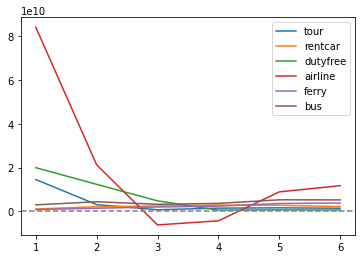

In [ ]:
plt.plot(every_sum.tour, label = every_sum.columns[0])
plt.plot(every_sum.rentcar, label = every_sum.columns[1])
plt.plot(every_sum.dutyfree, label = every_sum.columns[2])
plt.plot(every_sum.airline, label = every_sum.columns[3])
plt.plot(every_sum.ferry, label = every_sum.columns[4])
plt.plot(every_sum.bus, label = every_sum.columns[5])
plt.axhline(y=0, color='grey', linestyle='--')
plt.legend()

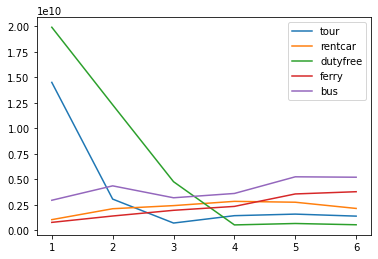

In [ ]:
#airline 변동폭이 지나치게 커서 다른 변수들의 변동폭이 희미하게 보임 --> airline 제외하고 plot

plt.plot(every_sum.tour, label = every_sum.columns[0])
plt.plot(every_sum.rentcar, label = every_sum.columns[1])
plt.plot(every_sum.dutyfree, label = every_sum.columns[2])

plt.plot(every_sum.ferry, label = every_sum.columns[4])
plt.plot(every_sum.bus, label = every_sum.columns[5])
plt.legend()

감소 --> 면세점, 관광     /      
증가 --> 렌트카, 여객선, 고속버스 (주로 국내여행)

In [ ]:
every_sum

,tour,rentcar,dutyfree,airline,ferry,bus
month,,,,,,
1,14515564097,1062554535,19920968010,84021067185,794992717,2962775980
2,3077039119,2132705868,12321127045,21209839685,1419942518,4374775810
3,730158781,2438105735,4781544539,-6197703234,1978046472,3206740580
4,1451840918,2856342632,546196233,-4320286708,2361497957,3629714430
5,1605042749,2770062161,685603328,8880507006,3581443871,5261811270
6,1407262748,2161188927,561510152,11712835032,3800497590,5221373400


### **소비 변화량**

In [ ]:
every_sum_temp = every_sum.copy()
#적자를 기록한 항공 업종의 경우 ValueError 발생 가능하므로 0에 가까운 값으로 변환
every_sum_temp.loc[every_sum.airline<0,'airline'] = 1e-6

In [ ]:
every_sum_temp

,tour,rentcar,dutyfree,airline,ferry,bus
month,,,,,,
1,14515564097,1062554535,19920968010,8.402107e+10,794992717,2962775980
2,3077039119,2132705868,12321127045,2.120984e+10,1419942518,4374775810
3,730158781,2438105735,4781544539,1.000000e-06,1978046472,3206740580
4,1451840918,2856342632,546196233,1.000000e-06,2361497957,3629714430
5,1605042749,2770062161,685603328,8.880507e+09,3581443871,5261811270
6,1407262748,2161188927,561510152,1.171284e+10,3800497590,5221373400


In [ ]:
#소비변화량 index 만들기

cat = every_sum_temp.columns
var2 = [x/y if y != 0 else 0 for x,y in zip((every_sum_temp[every_sum_temp.index == 2].T)[2], (every_sum_temp[every_sum_temp.index == 1].T)[1])]
var3 = [x/y if y != 0 else 0 for x,y in zip((every_sum_temp[every_sum_temp.index == 3].T)[3], (every_sum_temp[every_sum_temp.index == 2].T)[2])]
var_data = pd.DataFrame({'cat':cat,'var_2':var2,'var_3':var3})
var_data['var_index'] = [np.sqrt(x*y)-1 for x,y in zip(var_data.var_2,var_data.var_3)]

In [ ]:
var_data

,cat,var_2,var_3,var_index
0,tour,0.211982,2.372927e-01,-0.775719
1,rentcar,2.007150,1.143198e+00,0.514784
2,dutyfree,0.618500,3.880769e-01,-0.510076
3,airline,0.252435,4.714793e-17,-1.000000
4,ferry,1.786108,1.393047e+00,0.577381
5,bus,1.476580,7.330068e-01,0.040357


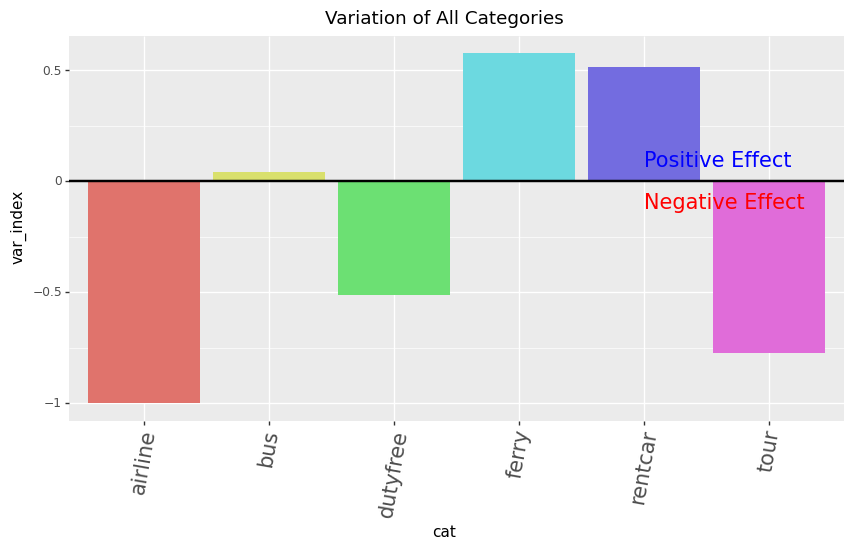

<ggplot: (-9223363266332770416)>

In [ ]:
import matplotlib.font_manager as fm
from plotnine.data import economics
from plotnine import *

import matplotlib.font_manager as fm
#font_location = '/content/NanumBarunGothic.ttf'
#font_name = fm.FontProperties(fname = font_location).get_name()

(ggplot(data=var_data,mapping=aes(x='cat',y='var_index'))
+geom_bar(stat='identity',mapping =aes(fill='cat'),show_legend=False)
+theme(text=element_text())
+theme(figure_size=(10,5),axis_text_x=element_text(size=15,angle=80))
+geom_hline(yintercept=0,size=1)
+annotate(geom='text',x=5,y=0.05,label='Positive Effect',va='bottom',ha='left',size=15,color='b')
+annotate(geom='text',x=5,y=-0.05,label='Negative Effect',va='top',ha='left',size=15,color='r')
+ggtitle('Variation of All Categories')
+scale_fill_hue(l=0.65)
)

### **소비량 회복속도**

In [ ]:
#소비량 회복속도 index 만들기

res4 = [(x-y)/y for x,y in zip((every_sum_temp[every_sum_temp.index == 4].T)[4],(every_sum_temp[every_sum_temp.index == 3].T)[3])]
res5 = [(x-y)/y for x,y in zip((every_sum_temp[every_sum_temp.index == 5].T)[5],(every_sum_temp[every_sum_temp.index == 4].T)[4])]
res_data = pd.DataFrame({'cat':cat,'res4':res4,'res5':res5})
res_data['res_index'] = (res_data.res5 + res_data.res4)/2
res_data.loc[res_data.cat=='airline','res_index'] =1
res_data['res_index_abs'] = abs((res_data.res5 + res_data.res4)/2)
res_data.loc[res_data.cat=='airline','res_index_abs'] =1

In [ ]:
res_data

,cat,res4,res5,res_index,res_index_abs
0,tour,0.988391,1.055225e-01,0.546957,0.546957
1,rentcar,0.171542,-3.020663e-02,0.070668,0.070668
2,dutyfree,-0.885770,2.552326e-01,-0.315269,0.315269
3,airline,0.000000,8.880507e+15,1.000000,1.000000
4,ferry,0.193854,5.165983e-01,0.355226,0.355226
5,bus,0.131901,4.496488e-01,0.290775,0.290775


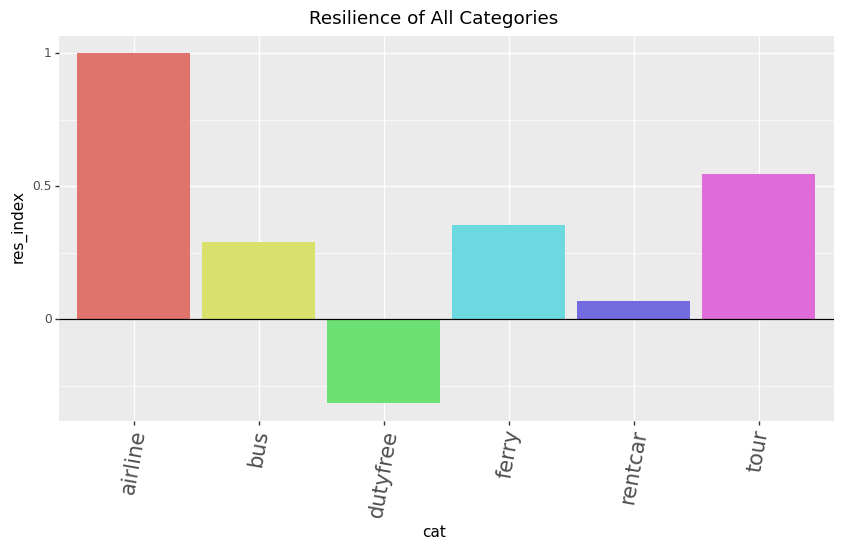

<ggplot: (-9223363266332744020)>

In [ ]:
#전체 업종 추이

(ggplot(data=res_data,mapping=aes(x='cat',y='res_index'))
+geom_bar(stat='identity',mapping =aes(fill='cat'),show_legend=False)
+theme(text=element_text())
+theme(figure_size=(10,5),axis_text_x=element_text(size=15,angle=80))
+geom_hline(yintercept=0)
+ggtitle('Resilience of All Categories')
+scale_fill_hue(l=0.65)
)

### **Risk-Resilience Matrix(타격-탄력성 분석)**

### **코로나 확진자 추이 분석**

### **코로나 확진자 추이와 카테고리 별 변화의 경향성**